# Zero-shot Object detection

In [1]:
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection
from transformers import OwlViTProcessor, OwlViTForObjectDetection
import torch

/home/suman/anaconda3/envs/365ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-21 20:32:20.541289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [86]:
checkpoint = "google/owlvit-large-patch14"
model = OwlViTForObjectDetection.from_pretrained(checkpoint, resume_download=True)
processor = OwlViTProcessor.from_pretrained(checkpoint, resume_download=True)

In [81]:
checkpoint = "google/owlvit-base-patch32"

model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint, resume_download=True)
processor = AutoProcessor.from_pretrained(checkpoint, resume_download=True)

KeyboardInterrupt: 

In [ ]:
type(model)

# save model

In [2]:
model_path = "saved_owlvit_large_model/model"

In [88]:
model.save_pretrained(model_path)
processor.save_pretrained(model_path)

# Load saved model

In [5]:
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_path)
processor = AutoProcessor.from_pretrained(model_path)

In [6]:
# model = OwlViTForObjectDetection.from_pretrained(model_path)
# processor = OwlViTProcessor.from_pretrained(model)

# Testing on Image

In [7]:
import requests
from PIL import Image, ImageDraw, ImageFont

In [8]:
image_url = "https://images.unsplash.com/photo-1493101561740-e745892775b2?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTB8fGNhdCUyMGFuZCUyMGh1bWFufGVufDB8fDB8fHww&auto=format&fit=crop&w=500&q=60"
image = Image.open(requests.get(image_url, stream=True).raw)

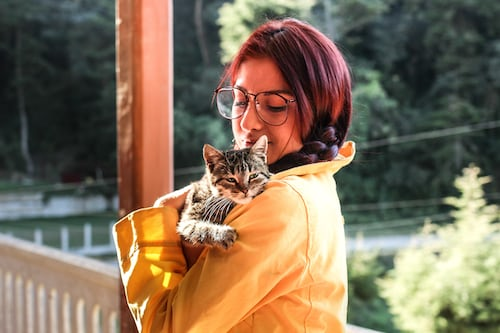

In [9]:
image

In [10]:
text_queries = ["cat", "glasses",]
inputs = processor(text=text_queries, images=image, return_tensors="pt") #pt --> pytorch

In [11]:
type(inputs)

transformers.tokenization_utils_base.BatchEncoding

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

In [ ]:
results

In [111]:
draw = ImageDraw.Draw(image)

scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()

for box, score, label in zip(boxes, scores, labels):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{text_queries[label]}: {round(score,2)}", fill="white")

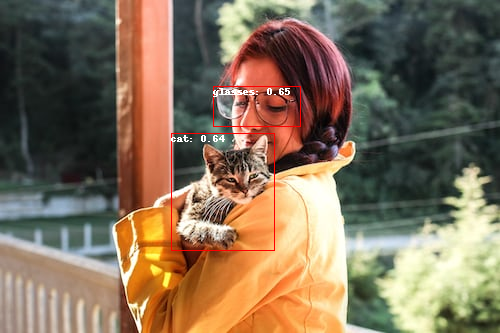

In [112]:
image

# Custom Function

In [129]:
def detector(image, classes, class_description, threshold=0.1, line_width=1,font_size=12, verbose=False):
    inputs = processor(text=class_description, images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        target_sizes = torch.tensor([image.size[::-1]])
        results = processor.post_process_object_detection(outputs, threshold=threshold, target_sizes=target_sizes)[0]
        if verbose:
            print(results)
    # draw bounding box
    draw = ImageDraw.Draw(image)
    # Change the font size
    font = ImageFont.truetype("/usr/share/fonts/truetype/abyssinica/AbyssinicaSIL-Regular.ttf", size=font_size)

    scores = results["scores"].tolist()
    labels = results["labels"].tolist()
    boxes = results["boxes"].tolist()
    
    
    for box, score, label in zip(boxes, scores, labels):
        xmin, ymin, xmax, ymax = box
        draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=line_width)
        draw.text((xmin, ymin), f"{classes[label]}: {round(score,2)}", fill="black", font=font)
    return image

In [117]:
!ls

 children_playing.jpg				    saved_owlvit_large_model
'Object detection (not using hugging face).ipynb'  'Untitled Folder'
'Object Detection using OWL_VIT .ipynb'


In [115]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

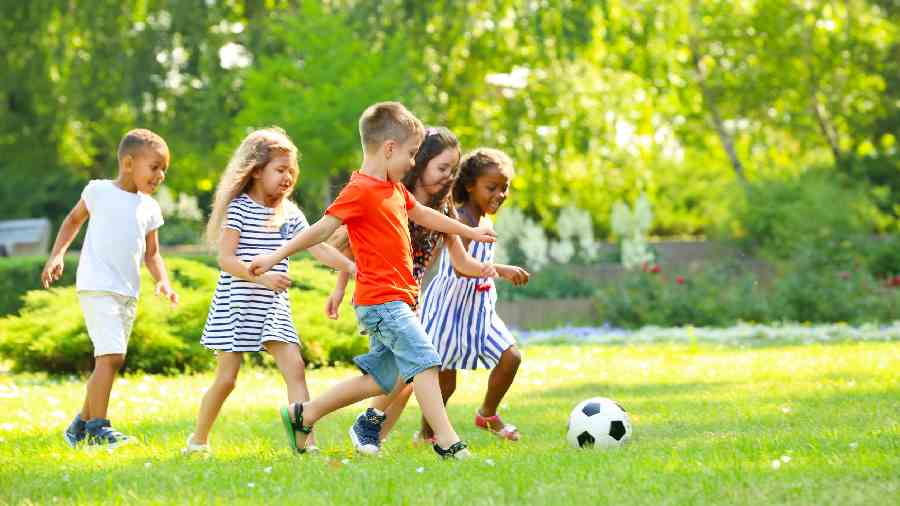

In [150]:
image_path = "children_playing.jpg"
image = Image.open(image_path)
image

In [151]:
classes = ["shoe", "t-shirt"]
class_description = ["a picture of a clear shoe", "a picture of a t-shirt"]
processed_image = detector(image, classes, class_description, line_width=1, font_size=15)

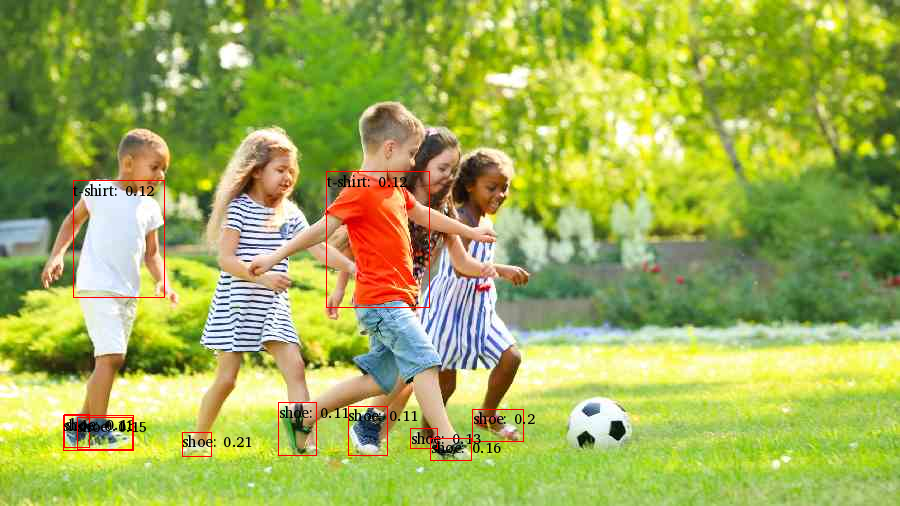

In [152]:
processed_image

# Test Image 2

In [124]:
!ls

 children_playing.jpg				    poolballs.jpg
'Object detection (not using hugging face).ipynb'   saved_owlvit_large_model
'Object Detection using OWL_VIT .ipynb'		   'Untitled Folder'
 output.png


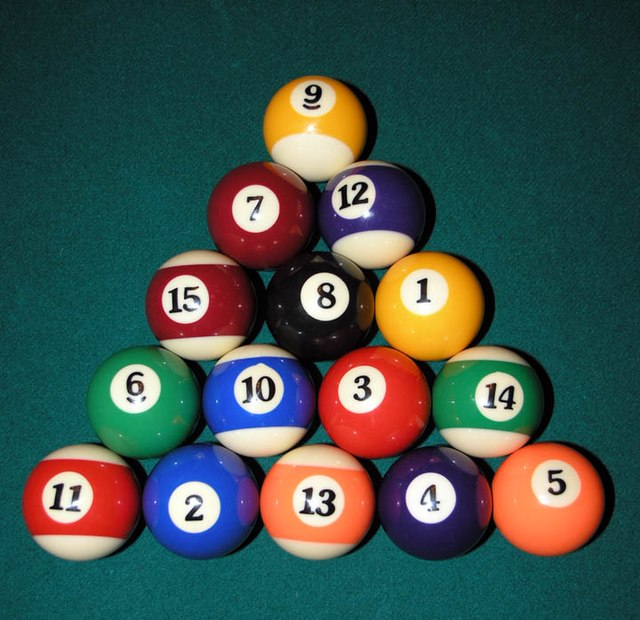

In [134]:
image_path = "poolballs.jpg"
image = Image.open(image_path)
image

In [141]:
classes = ["ball"]
class_description = ["number 1"]
processed_image = detector(image, classes, class_description, line_width=1, font_size=15)

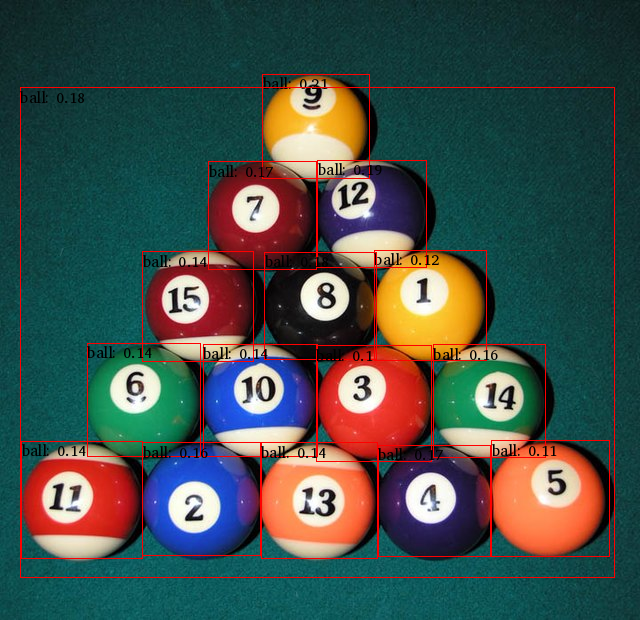

In [142]:
processed_image